In [ ]:
# Student names: Benjamin Rabishaw
# Student number: 1001556522
# Instructor: Shion Guha
# Course code: INF2178
# Course name: Experimental Design for Data Science
# Program: Master of Information
# Faculty of Information
# University of Toronto


# Technical Assignment 1
# February 2, 2024

In [45]:
# Initiating relevant libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Integrating Google Drive

from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
# Loading Dataset and surveying first rows

df = pd.read_csv('/drive/MyDrive/UofT/Colab/Files/INF2178_A1_data.csv')
df.head(25)

In [ ]:
# Displaying total length of dataframe

len(df)

In [ ]:
# Surveying columns

df.columns

In [ ]:
# Surveying column data types

df.dtypes

In [ ]:
# Data Cleaning for Research Question 1

## Removing columns for Research Question 1
dfrCRemove = ['ORGANIZATION_NAME', 'PROGRAM_ID', 'PROGRAM_NAME', 'SECTOR', 'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA', 'CAPACITY_TYPE', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']

## Making new dataframe for Research Question 1
dfr = df.drop(dfrCRemove, axis='columns')

## Setting index for new dataframe and converting it to datetime
dfr.set_index('OCCUPANCY_DATE', inplace=True)
dfr.index = pd.to_datetime(dfr.index)

## Surveying first rows
dfr.head(25)

In [ ]:
# Grouping users by day

dfrD = dfr.resample('D').sum()
dfrD

In [28]:
# Descriptive statistics for shelter usage

dfr.describe()

,SERVICE_USER_COUNT
count,50944.000000
mean,45.727171
std,53.326049
min,1.000000
25%,15.000000
50%,28.000000
75%,51.000000
max,339.000000


In [27]:
# Descriptive statistics for shelter usage by day

dfrD.describe()

,SERVICE_USER_COUNT
count,365.000000
mean,6382.260274
std,469.984774
min,5728.000000
25%,6016.000000
50%,6270.000000
75%,6696.000000
max,7379.000000


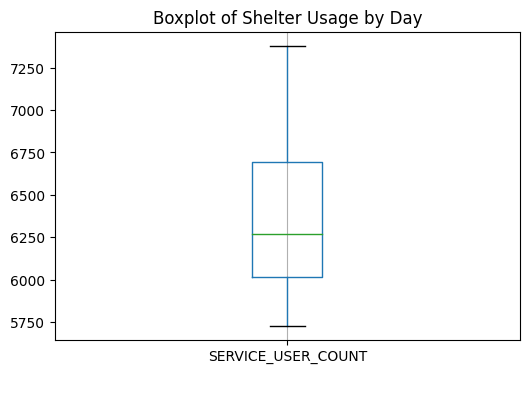

In [44]:
# Boxplot for shelter usage by day

plt.figure(figsize=(6, 4))
dfrD.boxplot()
plt.title('Boxplot of Shelter Usage by Day')
plt.xlabel(' ')
plt.ylabel('')
plt.grid(axis='y', linestyle='')
plt.show()

In [ ]:
# Grouping users by week

dfrW = dfr.resample('W').sum()
dfrW

In [ ]:
# Grouping users by month

dfrM = dfr.resample('M').sum()
dfrM

In [47]:
# Descriptive statistics for shelter usage by month

dfrM.describe()

,SERVICE_USER_COUNT
count,12.000000
mean,194127.083333
std,16689.717997
min,169838.000000
25%,184630.000000
50%,191610.500000
75%,202625.500000
max,225932.000000


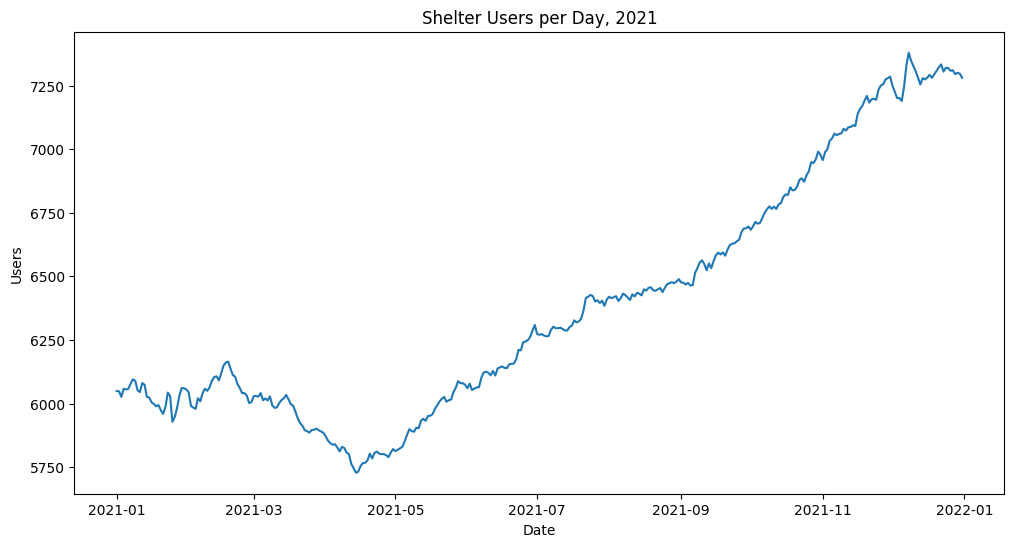

In [22]:
# Graphing users over time

plt.figure(figsize=(12, 6))
plt.plot(dfrD.index, dfrD['SERVICE_USER_COUNT'])
plt.title('Shelter Users per Day, 2021')
plt.xlabel('Date')
plt.ylabel('Users')
plt.grid(False)
plt.show()

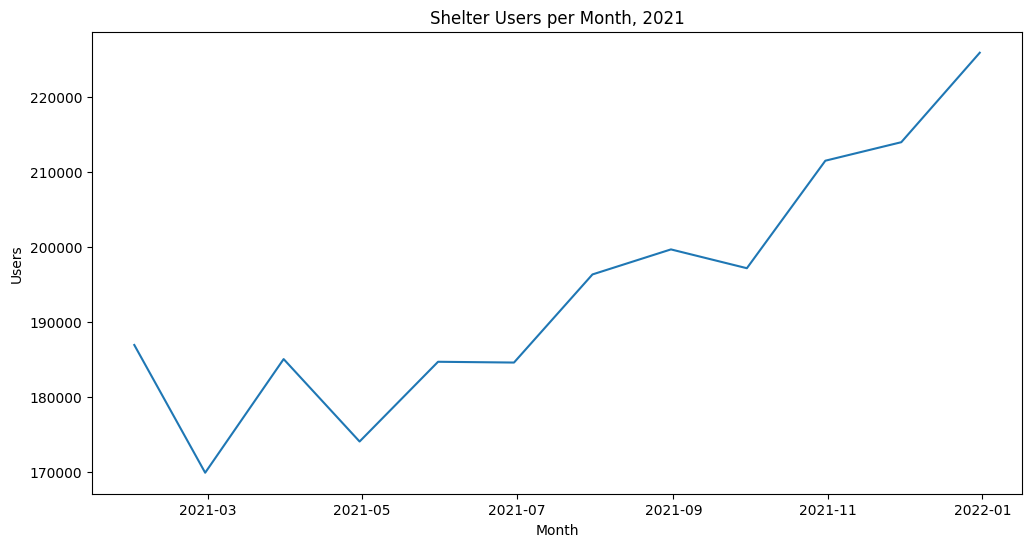

In [ ]:
# Graphing users over month

plt.figure(figsize=(12, 6))
plt.plot(dfrM.index, dfrM['SERVICE_USER_COUNT'])
plt.title('Shelter Users per Month, 2021')
plt.xlabel('Month')
plt.ylabel('Users')
plt.grid(False)
plt.show()

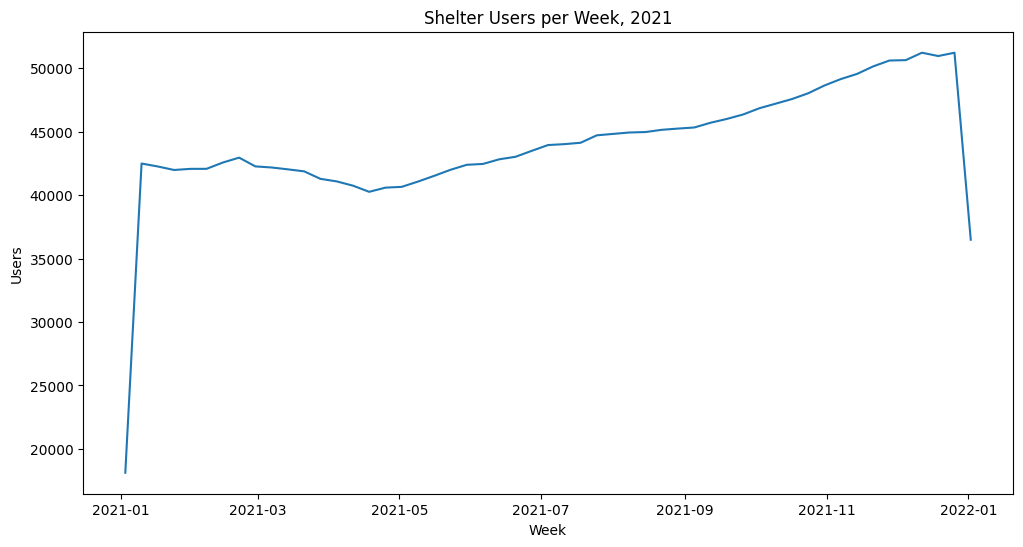

In [23]:
# Graphing users over  week

plt.figure(figsize=(12, 6))
plt.plot(dfrW.index, dfrW['SERVICE_USER_COUNT'])
plt.title('Shelter Users per Week, 2021')
plt.xlabel('Week')
plt.ylabel('Users')
plt.grid(False)
plt.show()

In [65]:
# T-tests for Research Question 1

from scipy import stats

## Determining the users per month for each month of interest
DUsers03 = dfrD[dfrD.index.month == 3]['SERVICE_USER_COUNT']
DUsers04 = dfrD[dfrD.index.month == 4]['SERVICE_USER_COUNT']
DUsers05 = dfrD[dfrD.index.month == 5]['SERVICE_USER_COUNT']
DUsers11 = dfrD[dfrD.index.month == 11]['SERVICE_USER_COUNT']
DUsers12 = dfrD[dfrD.index.month == 12]['SERVICE_USER_COUNT']
## Printing results to confirm
### print(DUsers05)


## Determining overall mean
dfrDmu = dfrD['SERVICE_USER_COUNT'].mean()


## One-sample t-tests

### March

t_stat, p_val = stats.ttest_1samp(DUsers03, popmean = dfrDmu)
print("t-statistic for March = " + str(t_stat))
print("p-value for March = " + str(p_val))

### April

t_stat, p_val = stats.ttest_1samp(DUsers04, popmean = dfrDmu)
print("t-statistic for April = " + str(t_stat))
print("p-value for April = " + str(p_val))

### May

t_stat, p_val = stats.ttest_1samp(DUsers05, popmean = dfrDmu)
print("t-statistic for May = " + str(t_stat))
print("p-value for May = " + str(p_val))

### November

t_stat, p_val = stats.ttest_1samp(DUsers11, popmean = dfrDmu)
print("t-statistic for November = " + str(t_stat))
print("p-value for November = " + str(p_val))

### December

t_stat, p_val = stats.ttest_1samp(DUsers12, popmean = dfrDmu)
print("t-statistic for December = " + str(t_stat))
print("p-value for December = " + str(p_val))


t-statistic for March = -40.17437538019582
p-value for March = 1.2074728884529427e-27
t-statistic for April = -91.22779036119051
p-value for April = 3.2127949784583884e-37
t-statistic for May = -28.128668016946946
p-value for May = 4.0479896300111075e-23
t-statistic for November = 44.0767466506896
p-value for November = 3.9755292453323444e-28
t-statistic for December = 116.39415196869219
p-value for December = 2.111959529774661e-41
